1. DATA PREPROCESSING


In [8]:
pip install numpy pandas matplotlib scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [9]:
import pandas as pd
data=pd.read_csv('C:/Users/antho/Downloads/Telegram Desktop/Climate_AI/climate_change.csv')
data.head()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149


In [10]:
data.shape

(308, 11)

In [11]:
data.columns

Index(['Year', 'Month', 'MEI', 'CO2', 'CH4', 'N2O', 'CFC-11', 'CFC-12', 'TSI',
       'Aerosols', 'Temp'],
      dtype='object')

In [12]:
columns_to_drop = ['Year', 'Month']
df = data.drop(columns_to_drop, axis=1) #axis=1 as we are specifying the columns which has to be dropped.

In [13]:
g= df.columns
print(g)
df.head()

Index(['MEI', 'CO2', 'CH4', 'N2O', 'CFC-11', 'CFC-12', 'TSI', 'Aerosols',
       'Temp'],
      dtype='object')


,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149


In [14]:
df.isna().sum()

MEI         0
CO2         0
CH4         0
N2O         0
CFC-11      0
CFC-12      0
TSI         0
Aerosols    0
Temp        0
dtype: int64

2. TRAIN TEST SPLIT

In [33]:
#splitting the  x(features) and y(target):
from sklearn.model_selection import train_test_split
X=df[['MEI', 'CO2', 'CH4', 'N2O', 'CFC-11', 'CFC-12', 'TSI', 'Aerosols']]
Y = df[['Temp']]
#Splitting the data into test and training set:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("X_train",X_train.shape)
print("X_test",X_test.shape)
print("Y_train",Y_train.shape)
print("Y_test",Y_test.shape)



X_train (246, 8)
X_test (62, 8)
Y_train (246, 1)
Y_test (62, 1)


3. TRAINING


In [34]:
#Training part:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, Y_train)

#Evaluating part:
Y_pred = model.predict(X_test)
print(Y_pred)

[[ 0.43808106]
 [-0.01471317]
 [ 0.15372611]
 [ 0.14152608]
 [ 0.03413299]
 [ 0.01966167]
 [ 0.1456266 ]
 [ 0.27725137]
 [ 0.44465791]
 [ 0.15326482]
 [ 0.1198827 ]
 [ 0.23009079]
 [ 0.32776898]
 [ 0.3485866 ]
 [ 0.46224121]
 [ 0.40805462]
 [ 0.00728524]
 [ 0.21061223]
 [ 0.22559964]
 [ 0.34844739]
 [ 0.14107773]
 [ 0.0687327 ]
 [ 0.24821029]
 [ 0.38487646]
 [ 0.10873031]
 [ 0.41903617]
 [ 0.03912889]
 [ 0.00835018]
 [ 0.37944881]
 [ 0.45826951]
 [ 0.14898507]
 [ 0.09325614]
 [ 0.23017103]
 [ 0.46419138]
 [ 0.16973004]
 [ 0.03094162]
 [ 0.10835344]
 [ 0.01105057]
 [ 0.28356346]
 [ 0.21062545]
 [ 0.06032418]
 [-0.01083588]
 [ 0.50101344]
 [ 0.42917442]
 [ 0.35191996]
 [ 0.31119813]
 [ 0.44894458]
 [ 0.02292758]
 [ 0.42224035]
 [ 0.16312897]
 [ 0.06851711]
 [ 0.44685438]
 [ 0.26045341]
 [ 0.22160561]
 [ 0.41011635]
 [ 0.43774585]
 [ 0.40778844]
 [ 0.29495753]
 [ 0.32380517]
 [ 0.37186819]
 [ 0.47335262]
 [ 0.23283914]]


4. EVALUATION

In [35]:
# Calculate the Mean Squared Error (MSE) and R-squared (R^2) value
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 0.009752754753819655
R-squared: 0.6979288977936203


5. SAVE MODEL FILE


In [29]:
pip install joblib


Note: you may need to restart the kernel to use updated packages.


In [36]:
import joblib

# Save the model to a file
joblib.dump(model, 'climate_change_model.pkl')

['climate_change_model.pkl']

6. DATA VISUALIZATION

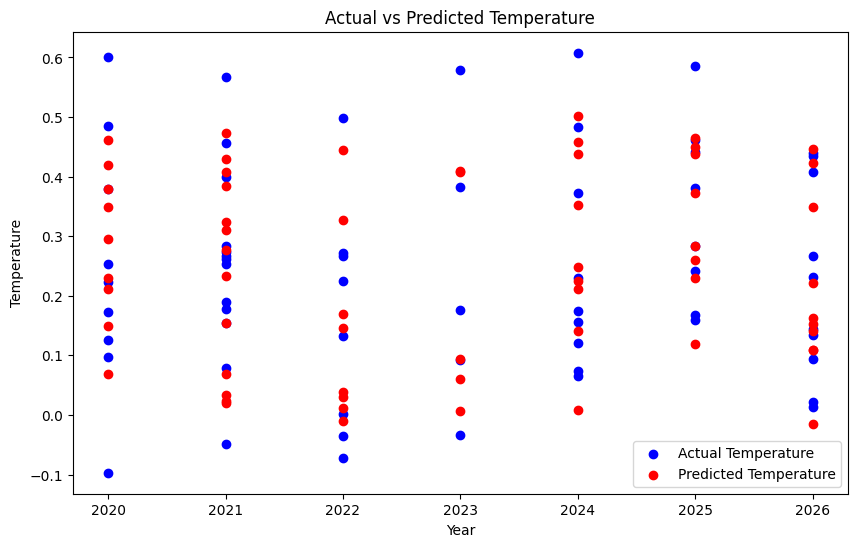

In [31]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
plt.scatter(predictions['Year'], predictions['Temp'], color='blue', label='Actual Temperature')
plt.scatter(predictions['Year'], predictions['Predicted_Temp'], color='red', label='Predicted Temperature')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.title('Actual vs Predicted Temperature')
plt.legend()
plt.show()

7. INFERENCE


In [32]:
predictions = pd.DataFrame(X_test, columns=X_test.columns)
predictions['Temp'] = Y_test.values
predictions['Predicted_Temp'] = Y_pred

# Print predictions in the desired format
print(predictions.head(20))  # Adjust the number of rows as needed

# Save the predictions to a CSV file if needed
predictions.to_csv('predictions.csv', index=False)

         CH4      N2O   CFC-11   CFC-12        TSI  Aerosols   Temp  \
288  1795.65  320.445  247.224  538.130  1365.6932    0.0041  0.372   
9    1656.48  304.194  197.759  364.296  1365.6618    0.0416  0.013   
57   1701.18  306.699  242.064  440.937  1366.1079    0.0088  0.189   
60   1705.69  306.472  246.043  444.729  1366.3008    0.0071  0.175   
25   1659.40  305.027  212.512  381.642  1365.6964    0.0126 -0.049   
63   1691.77  306.522  248.187  449.005  1366.1451    0.0096  0.154   
92   1734.82  309.404  265.709  489.664  1366.0527    0.0060  0.224   
184  1771.02  313.700  265.911  537.326  1366.0766    0.0023  0.400   
244  1788.75  317.796  255.641  542.719  1366.3611    0.0029  0.499   
46   1695.08  305.812  231.325  416.063  1365.6693    0.0109  0.021   
75   1707.22  307.830  255.528  468.631  1366.5084    0.0083  0.168   
163  1772.83  312.358  268.872  532.220  1365.6994    0.0061  0.172   
294  1803.79  321.062  246.178  537.319  1365.6680    0.0042  0.266   
305  1